<a href="https://colab.research.google.com/github/ShivanshGupta02/Digit-Classification-on-MNIST-Dataset/blob/main/svm_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification using SVM classifier

#Import Libraries

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#loading the data

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

#EDA(Exploratory Data Analysis)
###involves data visualization and understanding the data

* Here, you can see 1797 image data points are present. Each data point consist of 64 features. Data points are mapped corressponding key "data"
* here, the range of value of each feature is [0,16]
* Target denotes the class(digit value eg. 0...9) to which each data point belongs.
* There are total of 10 classes(0,1,..,9) to which each data point can belong
* The same data points are present as 8*8 matrix corresponding to key "images" in digits dictionary
* Here, the given images are grayscale images


In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
# No. of samples
digits['target'].size

1797

In [ ]:
# 64 features of first data point is reshaped as 8*8 matrix
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# 8*8 grayscale image of first data point
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
# Target class of first 20 datapoints
digits['target'][0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

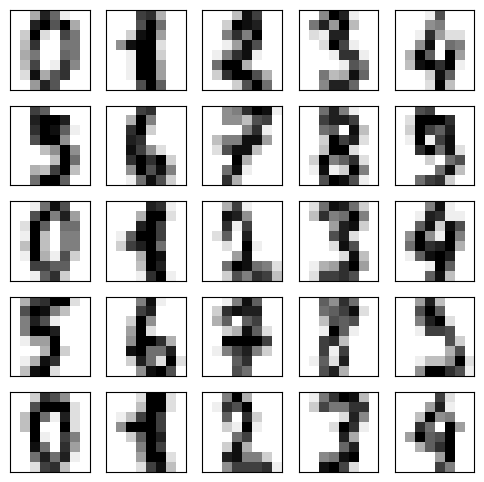

In [ ]:
# grayscale images of first 25 data points
fig, ax = plt.subplots(5,5,figsize=(6,6))
for i, axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='binary')
  axi.set(xticks=[],yticks=[])


In [ ]:
main_data = digits['data']
targets = digits['target']

#Splitting the data for training and testing the model


*   33 % of original data points will be used for testing purpose
*   rest of data points will be used for training purpose



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(main_data,targets,test_size = 0.20, random_state = 44)
print(x_train)

[[ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  7. ...  0.  0.  0.]
 [ 0.  1.  8. ...  5.  0.  0.]
 ...
 [ 0.  0. 13. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 [ 0.  0.  1. ... 13.  1.  0.]]


#Applying Principal Component Analysis to reduce the dimensionality of the data
Advantages :

*   Dimensionality Reduction
*   Noise Reduction
*   Feature Extraction

Steps involved in PCA :     

   

1.   Standardization of data (mean of each feature becomes zero and variance becomes 1 )  ( x = (x-μ)/σ )
2.   calculation of covaraince matrix
3.   Eigenvector and eigenvalue calculation
4.   Selection of principal components
5.   Projecting the original data on new set of axes formed by principal components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaling the data before applying PCA
scaling = StandardScaler()

#use fit and transorm method

x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

#set the no. of components(actually setting the variance of data that we want to capture)
principal = PCA(n_components=0.80)
x_train = principal.fit_transform(x_train)
x_test = principal.transform(x_test)

print(x_train.shape)
print(x_train)

(1437, 21)
[[ 2.90182560e+00  4.77371104e+00 -7.84258571e-02 ... -3.69480853e-01
   5.99983996e-02 -5.95612900e-01]
 [-2.22968487e+00  1.65400775e+00 -2.44584352e+00 ...  1.69388515e-01
  -9.92722065e-01  1.83291267e-01]
 [-1.21996933e+00  1.26855705e+00  1.50119437e-01 ...  1.85932904e-01
  -5.78090853e-01 -8.57154222e-01]
 ...
 [-1.14011025e+00  2.08430904e+00 -8.82576644e-01 ...  1.23809428e+00
  -1.36515376e+00  2.77197677e-02]
 [ 1.35295987e+00  1.86264995e+00 -3.94102157e+00 ... -4.28867303e-01
   1.53459247e-01 -5.42917599e-01]
 [-1.29196685e+00 -5.66899994e-01  6.57064268e-01 ... -8.30796714e-01
  -1.34958604e-01  3.18097558e-03]]


In [ ]:
# new set of axes
print(principal.components_)

[[ 2.06273211e-18 -1.77399698e-01 -2.86956878e-01 ... -9.10531741e-02
  -1.07249069e-01 -6.62230795e-02]
 [ 4.28542012e-18  2.91838576e-02  5.26923958e-02 ... -2.57658307e-01
  -2.01947558e-01 -9.61843220e-02]
 [-7.78471101e-20 -4.88401008e-02  3.83237884e-02 ...  6.82316174e-02
  -6.31544343e-02 -6.95657070e-02]
 ...
 [-1.97666303e-18 -1.16069765e-01 -2.05488373e-02 ... -1.05847997e-01
  -4.19135602e-02  9.39440246e-02]
 [ 3.40258512e-19  7.47249638e-02 -1.11785118e-02 ... -2.90691772e-02
  -6.44109752e-02 -3.42471150e-02]
 [-3.76562261e-18 -1.48778222e-02 -1.05633265e-01 ... -8.58270136e-02
  -2.30217446e-01 -4.00434214e-01]]


<ipython-input-41-eeed45a8981b>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_class[:, 0], x_class[:, 1], c=custom_colors[class_label], label=f'Class {class_label}', cmap='plasma')


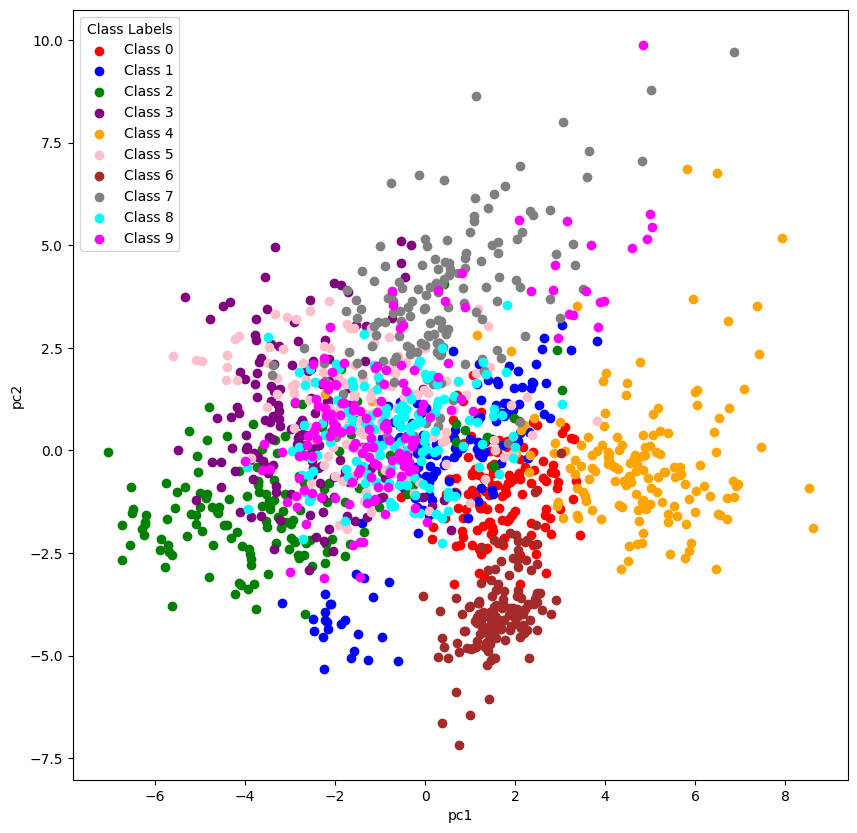

In [ ]:
# Custom colors for the 10 classes
custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']

plt.figure(figsize=(10, 10))
for class_label in range(10):
    # Filter the data points corresponding to the current class label
    class_indices = y_train == class_label
    x_class = x_train[class_indices]

    # Scatter plot the data points of the current class with the custom color
    plt.scatter(x_class[:, 0], x_class[:, 1], c=custom_colors[class_label], label=f'Class {class_label}', cmap='plasma')

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(title='Class Labels')
plt.show()


#Training the Support Vector Machine(SVM) model and tuning the hyperparameters for Support Vector Classifier with the help of "GRID SEARCH CV" method
[more about svm ](https://www.kaggle.com/code/faressayah/support-vector-machine-pca-tutorial-for-beginner)


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid  = {
    # various kernels
    'kernel' : ["linear", "rbf", "poly"],
    # degree of the polynomial kernel
    'degree' : [1,3,5,7],
    # Kernel coeffcient
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    # Penalty parameter
    'C' : [0.01,0.1,1,10,100]
}

In [ ]:
from sklearn import svm
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.937 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 2/5] END C=0.01, degree=1, gamma=1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 3/5] END C=0.01, degree=1, gamma=1, kernel=rbf;, score=0.105 total time=   0.1s
[CV 4/5] END C=0.01, degree=1, gamma=1, kernel=rbf;, score=0.105 total time=   0.1s
[CV 5/5] END C=0.01, degree=1, gamma=1, kernel=rbf;, score=0.105 total time=   0.1s
[CV 1/5] END C=0.01, degree=1, gamma=1, kernel=poly;, score=0.983 total time=   0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 3, 5, 7],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [ ]:
print(grid.best_params_ )

{'C': 0.01, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


In [ ]:
predictions = grid.predict(x_test)
# predicted class vs actual class
list(zip(predictions, y_test))

[(4, 4),
 (5, 5),
 (8, 8),
 (8, 8),
 (9, 9),
 (0, 0),
 (7, 7),
 (5, 5),
 (1, 1),
 (8, 8),
 (5, 5),
 (7, 7),
 (2, 2),
 (7, 7),
 (2, 2),
 (8, 8),
 (2, 2),
 (0, 0),
 (5, 5),
 (1, 1),
 (9, 9),
 (6, 6),
 (2, 2),
 (1, 1),
 (5, 5),
 (2, 2),
 (0, 6),
 (6, 6),
 (1, 1),
 (3, 3),
 (9, 9),
 (0, 0),
 (4, 4),
 (3, 3),
 (6, 6),
 (2, 2),
 (5, 5),
 (7, 7),
 (8, 8),
 (4, 4),
 (0, 0),
 (5, 5),
 (7, 7),
 (7, 7),
 (2, 2),
 (9, 9),
 (8, 8),
 (7, 7),
 (6, 6),
 (4, 4),
 (9, 9),
 (1, 1),
 (2, 2),
 (3, 3),
 (9, 9),
 (0, 0),
 (4, 4),
 (9, 9),
 (4, 4),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (6, 6),
 (9, 9),
 (3, 3),
 (1, 1),
 (3, 3),
 (3, 3),
 (5, 5),
 (8, 8),
 (8, 8),
 (0, 0),
 (1, 1),
 (6, 6),
 (5, 5),
 (1, 1),
 (5, 5),
 (4, 4),
 (2, 2),
 (9, 9),
 (9, 9),
 (3, 3),
 (2, 2),
 (9, 9),
 (1, 1),
 (7, 7),
 (4, 4),
 (2, 2),
 (9, 9),
 (0, 0),
 (3, 3),
 (5, 5),
 (6, 6),
 (6, 6),
 (3, 3),
 (6, 6),
 (4, 4),
 (0, 0),
 (8, 8),
 (5, 5),
 (3, 3),
 (1, 1),
 (1, 1),
 (0, 0),
 (7, 7),
 (1, 1),
 (1, 1),
 (5, 5),
 (1, 1),
 (1, 1),
 

<Axes: >

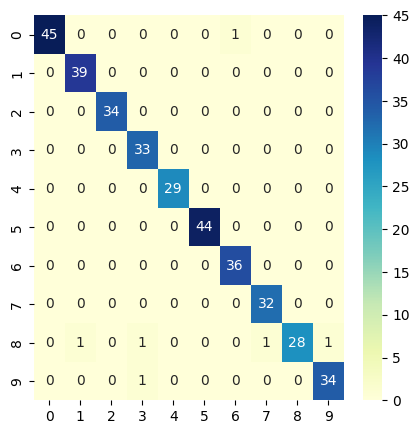

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(predictions,y_test)
conf_matrix = pd.DataFrame(data=cm)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap='YlGnBu')
# Confusion Matrix

In [ ]:
cm

array([[45,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 28,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 34]])

#Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y_test))

0.9833333333333333
